In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
conn = sqlite3.connect('sakila.db')
cur = conn.cursor()

In [3]:
cur.execute("""select name from sqlite_master where type = 'table';""")
print("List of tables")
table_list = [table[0] for table in cur.fetchall()]
table_list

List of tables


['actor',
 'country',
 'city',
 'address',
 'language',
 'category',
 'customer',
 'film',
 'film_actor',
 'film_category',
 'film_text',
 'inventory',
 'staff',
 'store',
 'payment',
 'rental']

## Tables we need to use to acheive the Goals and Objectives.

#### Data Exploration

In [4]:
category = pd.read_sql_query("select * from category", conn)
category

,category_id,name,last_update
0,1,Action,2021-03-06 15:52:00
1,2,Animation,2021-03-06 15:52:00
2,3,Children,2021-03-06 15:52:00
3,4,Classics,2021-03-06 15:52:00
4,5,Comedy,2021-03-06 15:52:00
5,6,Documentary,2021-03-06 15:52:00
6,7,Drama,2021-03-06 15:52:00
7,8,Family,2021-03-06 15:52:00
8,9,Foreign,2021-03-06 15:52:00
9,10,Games,2021-03-06 15:52:00


In [5]:
film_category = pd.read_sql_query("select * from film_category", conn)
film_category

,film_id,category_id,last_update
0,1,6,2021-03-06 15:53:28
1,2,11,2021-03-06 15:53:28
2,3,6,2021-03-06 15:53:28
3,4,11,2021-03-06 15:53:28
4,5,8,2021-03-06 15:53:28
...,...,...,...
995,996,6,2021-03-06 15:53:36
996,997,12,2021-03-06 15:53:36
997,998,11,2021-03-06 15:53:36
998,999,3,2021-03-06 15:53:36


In [6]:
rental = pd.read_sql_query("select * from rental", conn)
rental

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30.000,367,130,2005-05-26 22:04:30.000,1,2021-03-06 15:53:41
1,2,2005-05-24 22:54:33.000,1525,459,2005-05-28 19:40:33.000,1,2021-03-06 15:53:41
2,3,2005-05-24 23:03:39.000,1711,408,2005-06-01 22:12:39.000,1,2021-03-06 15:53:41
3,4,2005-05-24 23:04:41.000,2452,333,2005-06-03 01:43:41.000,2,2021-03-06 15:53:41
4,5,2005-05-24 23:05:21.000,2079,222,2005-06-02 04:33:21.000,1,2021-03-06 15:53:41
...,...,...,...,...,...,...,...
16039,16045,2005-08-23 22:25:26.000,772,14,2005-08-25 23:54:26.000,1,2021-03-06 15:55:57
16040,16046,2005-08-23 22:26:47.000,4364,74,2005-08-27 18:02:47.000,2,2021-03-06 15:55:57
16041,16047,2005-08-23 22:42:48.000,2088,114,2005-08-25 02:48:48.000,2,2021-03-06 15:55:57
16042,16048,2005-08-23 22:43:07.000,2019,103,2005-08-31 21:33:07.000,1,2021-03-06 15:55:57


In [7]:
customer = pd.read_sql_query("select * from customer", conn)
customer.head()

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36


In [8]:
inventory = pd.read_sql_query("select * from inventory", conn)
inventory.head()

,inventory_id,film_id,store_id,last_update
0,1,1,1,2021-03-06 15:52:08
1,2,1,1,2021-03-06 15:52:08
2,3,1,1,2021-03-06 15:52:08
3,4,1,1,2021-03-06 15:52:08
4,5,1,2,2021-03-06 15:52:08


In [9]:
payment = pd.read_sql_query("select * from payment", conn)
payment

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76.0,2.99,2005-05-25 11:30:37.000,2021-03-06 15:55:57
1,2,1,1,573.0,0.99,2005-05-28 10:35:23.000,2021-03-06 15:55:57
2,3,1,1,1185.0,5.99,2005-06-15 00:54:12.000,2021-03-06 15:55:57
3,4,1,2,1422.0,0.99,2005-06-15 18:02:53.000,2021-03-06 15:55:57
4,5,1,2,1476.0,9.99,2005-06-15 21:08:46.000,2021-03-06 15:55:57
...,...,...,...,...,...,...,...
16044,16045,599,1,14599.0,4.99,2005-08-21 17:43:42.000,2021-03-06 15:58:08
16045,16046,599,1,14719.0,1.99,2005-08-21 21:41:57.000,2021-03-06 15:58:08
16046,16047,599,2,15590.0,8.99,2005-08-23 06:09:44.000,2021-03-06 15:58:09
16047,16048,599,2,15719.0,2.99,2005-08-23 11:08:46.000,2021-03-06 15:58:09


In [10]:
film = pd.read_sql_query("select * from film", conn)
film.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00


In [11]:
film.dropna(inplace = True)

In [12]:
film.isnull().sum()

film_id                 0.0
title                   0.0
description             0.0
release_year            0.0
language_id             0.0
original_language_id    0.0
rental_duration         0.0
rental_rate             0.0
length                  0.0
replacement_cost        0.0
rating                  0.0
special_features        0.0
last_update             0.0
dtype: float64

In [13]:
for table in ('rental','customer','inventory','payment'):
    print('table:', table)
    column_info = conn.execute("PRAGMA table_info({})".format(table))
    for col in column_info.fetchall():
        print(col[1:3])
    print ('_'*60)


table: rental
('rental_id', 'INT')
('rental_date', 'TIMESTAMP')
('inventory_id', 'INT')
('customer_id', 'INT')
('return_date', 'TIMESTAMP')
('staff_id', 'SMALLINT')
('last_update', 'TIMESTAMP')
____________________________________________________________
table: customer
('customer_id', 'INT')
('store_id', 'INT')
('first_name', 'VARCHAR(45)')
('last_name', 'VARCHAR(45)')
('email', 'VARCHAR(50)')
('address_id', 'INT')
('active', 'CHAR(1)')
('create_date', 'TIMESTAMP')
('last_update', 'TIMESTAMP')
____________________________________________________________
table: inventory
('inventory_id', 'INT')
('film_id', 'INT')
('store_id', 'INT')
('last_update', 'TIMESTAMP')
____________________________________________________________
table: payment
('payment_id', 'INT')
('customer_id', 'INT')
('staff_id', 'SMALLINT')
('rental_id', 'INT')
('amount', 'DECIMAL(5,2)')
('payment_date', 'TIMESTAMP')
('last_update', 'TIMESTAMP')
____________________________________________________________


In [30]:
for table in ('rental','customer','inventory','film','category','film_category','payment'):
    print('table:', table)
    df_table = pd.read_sql_query(f"select * from {table}", conn)
    print(df_table.isnull().sum())
    print ('_'*60)

table: rental
rental_id         0
rental_date       0
inventory_id      0
customer_id       0
return_date     183
staff_id          0
last_update       0
dtype: int64
____________________________________________________________
table: customer
customer_id    0
store_id       0
first_name     0
last_name      0
email          0
address_id     0
active         0
create_date    0
last_update    0
dtype: int64
____________________________________________________________
table: inventory
inventory_id    0
film_id         0
store_id        0
last_update     0
dtype: int64
____________________________________________________________
table: film
film_id                    0
title                      0
description                0
release_year               0
language_id                0
original_language_id    1000
rental_duration            0
rental_rate                0
length                     0
replacement_cost           0
rating                     0
special_features           0
last_u

In [15]:
rental = pd.read_sql_query("select * from rental where return_date is not null", conn)
rental

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30.000,367,130,2005-05-26 22:04:30.000,1,2021-03-06 15:53:41
1,2,2005-05-24 22:54:33.000,1525,459,2005-05-28 19:40:33.000,1,2021-03-06 15:53:41
2,3,2005-05-24 23:03:39.000,1711,408,2005-06-01 22:12:39.000,1,2021-03-06 15:53:41
3,4,2005-05-24 23:04:41.000,2452,333,2005-06-03 01:43:41.000,2,2021-03-06 15:53:41
4,5,2005-05-24 23:05:21.000,2079,222,2005-06-02 04:33:21.000,1,2021-03-06 15:53:41
...,...,...,...,...,...,...,...
15856,16045,2005-08-23 22:25:26.000,772,14,2005-08-25 23:54:26.000,1,2021-03-06 15:55:57
15857,16046,2005-08-23 22:26:47.000,4364,74,2005-08-27 18:02:47.000,2,2021-03-06 15:55:57
15858,16047,2005-08-23 22:42:48.000,2088,114,2005-08-25 02:48:48.000,2,2021-03-06 15:55:57
15859,16048,2005-08-23 22:43:07.000,2019,103,2005-08-31 21:33:07.000,1,2021-03-06 15:55:57


In [16]:
payment = pd.read_sql_query("select * from payment where rental_id is not null", conn)
payment

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76,2.99,2005-05-25 11:30:37.000,2021-03-06 15:55:57
1,2,1,1,573,0.99,2005-05-28 10:35:23.000,2021-03-06 15:55:57
2,3,1,1,1185,5.99,2005-06-15 00:54:12.000,2021-03-06 15:55:57
3,4,1,2,1422,0.99,2005-06-15 18:02:53.000,2021-03-06 15:55:57
4,5,1,2,1476,9.99,2005-06-15 21:08:46.000,2021-03-06 15:55:57
...,...,...,...,...,...,...,...
16039,16045,599,1,14599,4.99,2005-08-21 17:43:42.000,2021-03-06 15:58:08
16040,16046,599,1,14719,1.99,2005-08-21 21:41:57.000,2021-03-06 15:58:08
16041,16047,599,2,15590,8.99,2005-08-23 06:09:44.000,2021-03-06 15:58:09
16042,16048,599,2,15719,2.99,2005-08-23 11:08:46.000,2021-03-06 15:58:09


## Basic Analysis:

#### What are the top 10 most rented movies and how often are they rented?

In [17]:
query1 = '''
SELECT f.title, COUNT(*) as rental_count
FROM rental r
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id
GROUP BY f.film_id
ORDER BY rental_count DESC
LIMIT 10
'''

In [18]:
top10_df = pd.read_sql_query(query1,conn)
top10_df

,title,rental_count
0,BUCKET BROTHERHOOD,34
1,ROCKETEER MOTHER,33
2,SCALAWAG DUCK,32
3,RIDGEMONT SUBMARINE,32
4,JUGGLER HARDLY,32
5,GRIT CLOCKWORK,32
6,FORWARD TEMPLE,32
7,ZORRO ARK,31
8,WIFE TURN,31
9,TIMBERLAND SKY,31


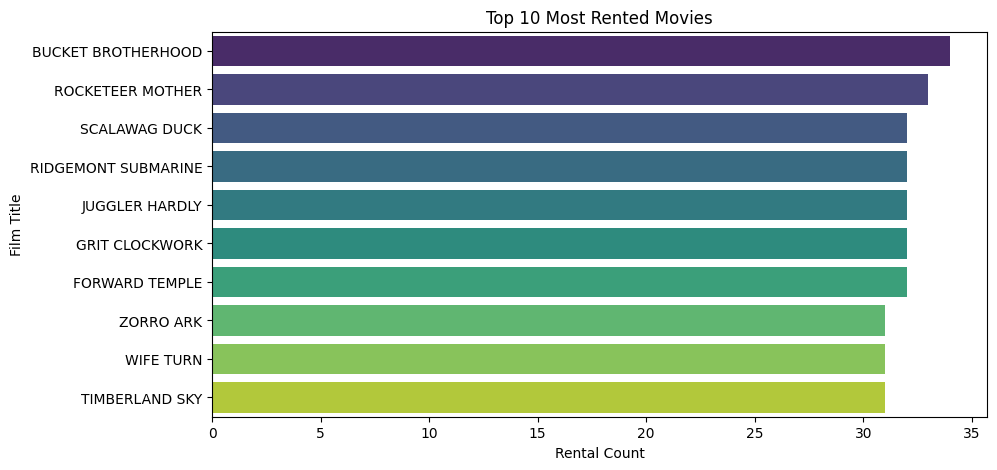

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top10_df, x='rental_count', y='title', palette='viridis')
plt.xlabel('Rental Count')
plt.ylabel('Film Title')
plt.title('Top 10 Most Rented Movies')
plt.show()

#### Which categories of movies are the most popular among customers?

In [20]:
query2 = '''
SELECT c.name as category_name, COUNT(*) as rental_count
FROM rental r
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id
JOIN film_category fc ON f.film_id = fc.film_id
JOIN category c ON fc.category_id = c.category_id
GROUP BY c.category_id
ORDER BY rental_count DESC
'''

In [21]:
popular_category_df = pd.read_sql_query(query2, conn)
popular_category_df

,category_name,rental_count
0,Sports,1179
1,Animation,1166
2,Action,1112
3,Sci-Fi,1101
4,Family,1096
5,Drama,1060
6,Documentary,1050
7,Foreign,1033
8,Games,969
9,Children,945


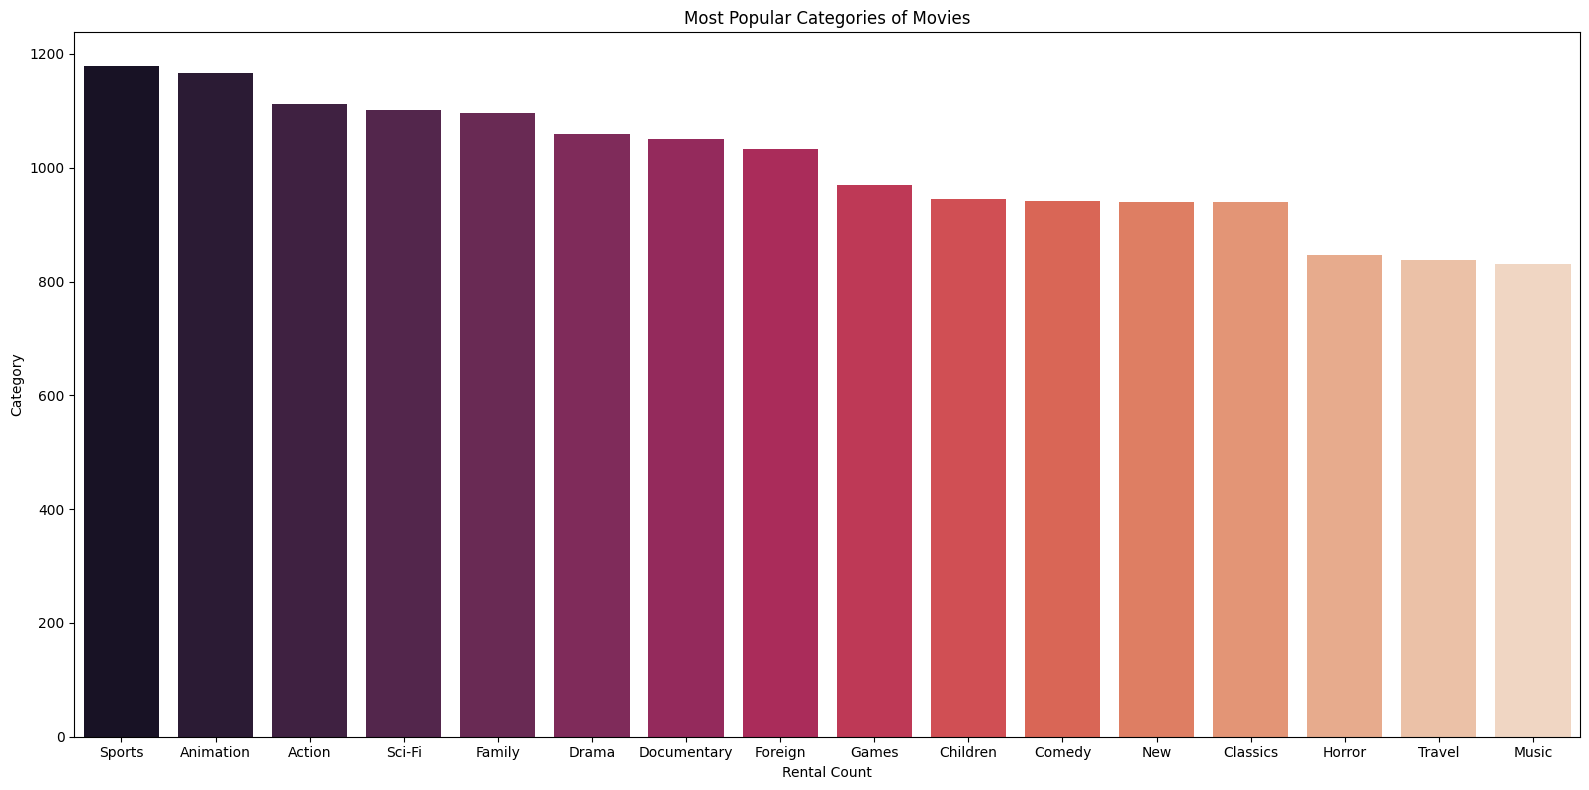

In [22]:
plt.figure(figsize=(16, 8))
sns.barplot(data=popular_category_df, x='category_name', y='rental_count', palette='rocket')
plt.xlabel('Rental Count')
plt.ylabel('Category')
plt.title('Most Popular Categories of Movies')
plt.tight_layout()
plt.show()

#### How many rentals were made in a month and what is the average rental duration?

In [23]:
query3 = '''
SELECT strftime('%Y-%m', rental_date) AS month,
       AVG(julianday(return_date) - julianday(rental_date)) AS avg_rental_duration,
       COUNT(*) AS num_rentals
FROM rental
WHERE return_date IS NOT NULL
GROUP BY month;
'''

In [24]:
ard_df = pd.read_sql_query(query3,conn)
ard_df

,month,avg_rental_duration,num_rentals
0,2005-05,4.900972,1156
1,2005-06,5.047450,2311
2,2005-07,5.020364,6709
3,2005-08,5.047487,5685


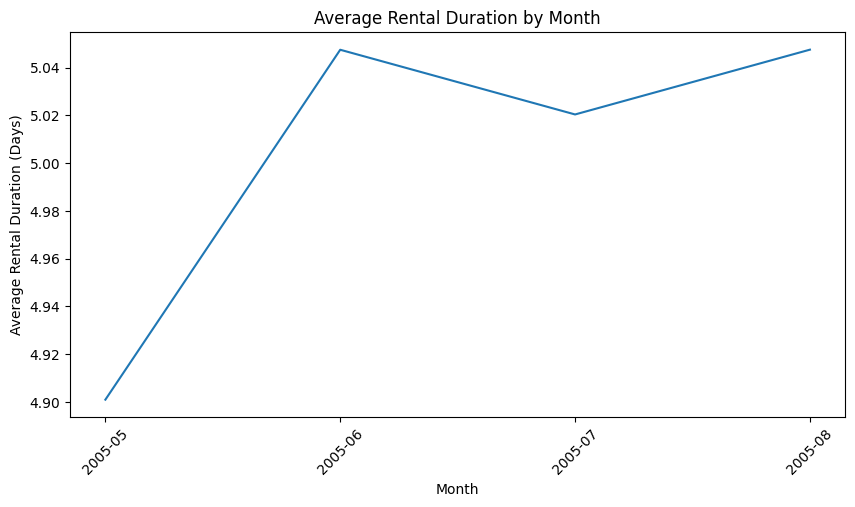

In [25]:
plt.figure(figsize= (10,5))
plt.plot(ard_df['month'], ard_df['avg_rental_duration'])
plt.title('Average Rental Duration by Month')
plt.xlabel('Month')
plt.ylabel('Average Rental Duration (Days)')
plt.xticks(rotation=45)
plt.show()

####  find the relationship between film prices and the rental count by customers?

In [33]:
query4 = '''
SELECT film.rental_rate, COUNT(rental.customer_id) AS rental_count
FROM film
JOIN inventory ON film.film_id = inventory.film_id
JOIN rental ON inventory.inventory_id = rental.inventory_id
GROUP BY film.rental_rate
ORDER BY film.rental_rate
'''

In [35]:
df4 = pd.read_sql_query(query4,conn)
df4.head(10)

,rental_rate,rental_count
0,0.99,5652
1,2.99,5120
2,4.99,5272


In [38]:
query5 = '''
SELECT c.name AS category_name, f.title AS most_rented_film, COUNT(*) AS rental_count
FROM rental r
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id
JOIN film_category fc ON f.film_id = fc.film_id
JOIN category c ON fc.category_id = c.category_id
GROUP BY c.name
HAVING rental_count = (
    SELECT COUNT(*)
    FROM rental r2
    JOIN inventory i2 ON r2.inventory_id = i2.inventory_id
    JOIN film f2 ON i2.film_id = f2.film_id
    JOIN film_category fc2 ON f2.film_id = fc2.film_id
    WHERE fc2.category_id = c.category_id
    GROUP BY fc2.category_id
    ORDER BY COUNT(*) DESC
    LIMIT 1
)
'''

In [39]:
df5 = pd.read_sql_query(query5,conn)
df5

,category_name,most_rented_film,rental_count
0,Action,AMADEUS HOLY,1112
1,Animation,ALTER VICTORY,1166
2,Children,BACKLASH UNDEFEATED,945
3,Classics,ARIZONA BANG,939
4,Comedy,AIRPLANE SIERRA,941
5,Documentary,ACADEMY DINOSAUR,1050
6,Drama,BEAUTY GREASE,1060
7,Family,AFRICAN EGG,1096
8,Foreign,AGENT TRUMAN,1033
9,Games,AUTUMN CROW,969


In [42]:
query6 = '''
SELECT film.replacement_cost, COUNT(rental.customer_id) AS rental_count
FROM film
JOIN inventory ON film.film_id = inventory.film_id
JOIN rental ON inventory.inventory_id = rental.inventory_id
GROUP BY film.replacement_cost
ORDER BY film.replacement_cost DESC;
'''

In [43]:
df6 = pd.read_sql_query(query6,conn)
df6

,replacement_cost,rental_count
0,29.99,868
1,28.99,716
2,27.99,958
3,26.99,737
4,25.99,740
5,24.99,633
6,23.99,690
7,22.99,1044
8,21.99,912
9,20.99,863


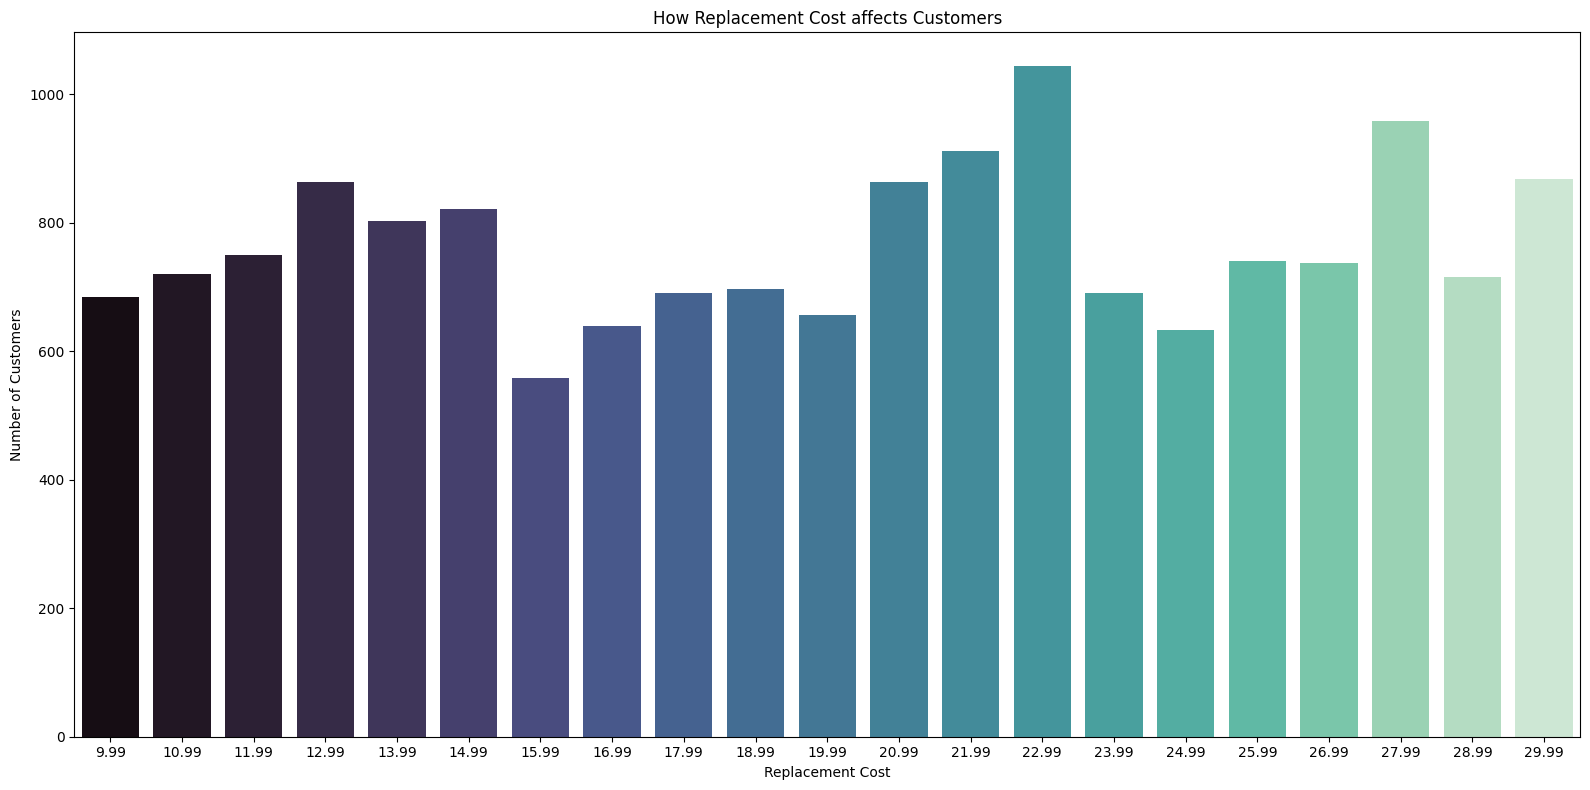

In [47]:
plt.figure(figsize=(16,8))
sns.barplot(data=df6, x='replacement_cost', y='rental_count', palette='mako')
plt.xlabel('Replacement Cost')
plt.ylabel('Number of Customers')
plt.title('How Replacement Cost affects Customers')
plt.tight_layout()
plt.show()

In [54]:
query8 = '''
SELECT i.film_id, f.title, f.rental_rate, COUNT(DISTINCT r.customer_id) AS rental_count, SUM(p.amount) AS revenue,
       AVG(f.rental_rate) AS avg_rental_rate
FROM inventory AS i
JOIN film AS f ON i.film_id = f.film_id
JOIN rental AS r ON i.inventory_id = r.inventory_id
JOIN payment AS p ON r.rental_id = p.rental_id
GROUP BY i.film_id
'''

In [55]:
df8 = pd.read_sql_query(query8, conn)
df8

,film_id,title,rental_rate,rental_count,revenue,avg_rental_rate
0,1,ACADEMY DINOSAUR,0.99,23,36.77,0.99
1,2,ACE GOLDFINGER,4.99,7,52.93,4.99
2,3,ADAPTATION HOLES,2.99,12,37.88,2.99
3,4,AFFAIR PREJUDICE,2.99,22,91.77,2.99
4,5,AFRICAN EGG,2.99,12,51.88,2.99
...,...,...,...,...,...,...
953,996,YOUNG LANGUAGE,0.99,7,6.93,0.99
954,997,YOUTH KICK,0.99,6,16.94,0.99
955,998,ZHIVAGO CORE,0.99,9,14.91,0.99
956,999,ZOOLANDER FICTION,2.99,17,73.83,2.99


In [56]:
df8['revenue_per_rental'] = df8['revenue'] / df8['rental_count']

In [57]:
df8['revenue_per_rental_rate'] = df8['revenue'] / df8['avg_rental_rate'] / df8['rental_count']

In [58]:
df8 = df8.sort_values(by='revenue_per_rental_rate', ascending=False)

In [60]:
df8[['title', 'revenue_per_rental_rate']].head(10)

,title,revenue_per_rental_rate
573,MOTHER OLEANDER,5.040404
716,RUN PACIFIC,4.535354
912,WAIT CIDER,4.454545
258,EGYPT TENENBAUMS,4.327392
101,BUTTERFLY CHOCOLAT,4.308603
697,RIDGEMONT SUBMARINE,4.125000
592,NEIGHBORS CHARADE,4.085859
208,DESTINATION JERK,4.030303
853,TIMBERLAND SKY,4.030303
103,CADDYSHACK JEDI,4.027972


In [62]:
df8.head(10)

,film_id,title,rental_rate,rental_count,revenue,avg_rental_rate,revenue_per_rental,revenue_per_rental_rate
573,599,MOTHER OLEANDER,0.99,14,69.86,0.99,4.990000,5.040404
716,750,RUN PACIFIC,0.99,10,44.90,0.99,4.490000,4.535354
912,953,WAIT CIDER,0.99,19,83.79,0.99,4.410000,4.454545
258,275,EGYPT TENENBAUMS,0.99,17,72.83,0.99,4.284118,4.327392
101,109,BUTTERFLY CHOCOLAT,0.99,29,123.70,0.99,4.265517,4.308603
697,730,RIDGEMONT SUBMARINE,0.99,32,130.68,0.99,4.083750,4.125000
592,619,NEIGHBORS CHARADE,0.99,18,72.81,0.99,4.045000,4.085859
208,225,DESTINATION JERK,0.99,8,31.92,0.99,3.990000,4.030303
853,891,TIMBERLAND SKY,0.99,31,123.69,0.99,3.990000,4.030303
103,111,CADDYSHACK JEDI,0.99,13,51.84,0.99,3.987692,4.027972


##### These films may be good candidates for rental price increases to maximize profitability while still retaining customers.

In [75]:
df_rentals = pd.read_sql_query('''
    SELECT i.film_id, f.title, f.rental_rate, r.rental_id, COUNT(DISTINCT r.customer_id) AS rental_count, SUM(p.amount) AS revenue
    FROM inventory AS i
    JOIN film AS f ON i.film_id = f.film_id
    JOIN rental AS r ON i.inventory_id = r.inventory_id
    JOIN payment AS p ON r.rental_id = p.rental_id
    GROUP BY i.film_id
    ORDER BY revenue DESC
''', conn)
df_rentals

,film_id,title,rental_rate,rental_id,rental_count,revenue
0,879,TELEGRAPH VOYAGE,4.99,8705,27,231.73
1,973,WIFE TURN,4.99,8615,28,223.69
2,1000,ZORRO ARK,4.99,1084,30,214.69
3,369,GOODFELLAS SALUTE,4.99,5107,31,209.69
4,764,SATURDAY LAMBS,4.99,4611,28,204.72
...,...,...,...,...,...,...
953,996,YOUNG LANGUAGE,0.99,12377,7,6.93
954,261,DUFFEL APOCALYPSE,0.99,14093,7,6.93
955,335,FREEDOM CLEOPATRA,0.99,14459,5,5.95
956,885,TEXAS WATCH,0.99,14028,6,5.94


In [79]:
df_rentals['profitability'] = df_rentals['revenue'] / df_rentals['rental_count']
df_rentals

,film_id,title,rental_rate,rental_id,rental_count,revenue,profitability
0,879,TELEGRAPH VOYAGE,4.99,8705,27,231.73,8.582593
1,973,WIFE TURN,4.99,8615,28,223.69,7.988929
2,1000,ZORRO ARK,4.99,1084,30,214.69,7.156333
3,369,GOODFELLAS SALUTE,4.99,5107,31,209.69,6.764194
4,764,SATURDAY LAMBS,4.99,4611,28,204.72,7.311429
...,...,...,...,...,...,...,...
953,996,YOUNG LANGUAGE,0.99,12377,7,6.93,0.990000
954,261,DUFFEL APOCALYPSE,0.99,14093,7,6.93,0.990000
955,335,FREEDOM CLEOPATRA,0.99,14459,5,5.95,1.190000
956,885,TEXAS WATCH,0.99,14028,6,5.94,0.990000


In [80]:
df_categories = pd.read_sql_query('''
    SELECT c.category_id, c.name AS category_name, COUNT(DISTINCT r.customer_id) AS rental_count
    FROM rental AS r
    JOIN inventory AS i ON r.inventory_id = i.inventory_id
    JOIN film_category AS fc ON i.film_id = fc.film_id
    JOIN category AS c ON fc.category_id = c.category_id
    GROUP BY c.category_id
    ORDER BY rental_count DESC
''', conn)
df_categories

,category_id,category_name,rental_count
0,15,Sports,519
1,1,Action,510
2,14,Sci-Fi,507
3,8,Family,501
4,7,Drama,501
5,2,Animation,500
6,5,Comedy,495
7,9,Foreign,493
8,6,Documentary,483
9,3,Children,482


In [93]:
df_customers = pd.read_sql_query('''
    SELECT r.customer_id, c.first_name , COUNT(r.rental_id) AS rental_count
    FROM rental r
    JOIN customer c ON r.customer_id = c.customer_id
    GROUP BY r.customer_id
''', conn)
df_customers

,customer_id,first_name,rental_count
0,1,MARY,32
1,2,PATRICIA,27
2,3,LINDA,26
3,4,BARBARA,22
4,5,ELIZABETH,38
...,...,...,...
594,595,TERRENCE,30
595,596,ENRIQUE,28
596,597,FREDDIE,25
597,598,WADE,22


In [94]:
rental_count_percentiles = df_customers['rental_count'].quantile([0.25, 0.5, 0.75]).values
rental_count_percentiles

array([23., 26., 30.])

In [95]:
def categorize_customers(row):
    if row['rental_count'] <= rental_count_percentiles[0]:
        return 'Low frequency'
    elif row['rental_count'] <= rental_count_percentiles[1]:
        return 'Medium frequency'
    elif row['rental_count'] <= rental_count_percentiles[2]:
        return 'High frequency'
    else:
        return 'Very high frequency'

In [101]:
df_customers['frequency_category'] = df_customers.apply(categorize_customers, axis=1)
df_customers.head()

,customer_id,first_name,rental_count,frequency_category
0,1,MARY,32,Very high frequency
1,2,PATRICIA,27,High frequency
2,3,LINDA,26,Medium frequency
3,4,BARBARA,22,Low frequency
4,5,ELIZABETH,38,Very high frequency


In [102]:
import numpy as np
df_customers['needed'] = np.where(df_customers['frequency_category'] == 'Low frequency', 'Yes', 'No')


In [103]:
df_customers

,customer_id,first_name,rental_count,frequency_category,needed
0,1,MARY,32,Very high frequency,No
1,2,PATRICIA,27,High frequency,No
2,3,LINDA,26,Medium frequency,No
3,4,BARBARA,22,Low frequency,Yes
4,5,ELIZABETH,38,Very high frequency,No
...,...,...,...,...,...
594,595,TERRENCE,30,High frequency,No
595,596,ENRIQUE,28,High frequency,No
596,597,FREDDIE,25,Medium frequency,No
597,598,WADE,22,Low frequency,Yes


In [118]:
data = pd.read_sql_query('''
    SELECT f.film_id, f.title, r.rental_id, r.rental_date, r.return_date, r.customer_id, 
           r.staff_id, i.inventory_id, f.rental_duration, f.rental_rate, f.replacement_cost
    FROM film AS f
    JOIN inventory AS i ON f.film_id = i.film_id
    JOIN rental AS r ON i.inventory_id = r.inventory_id
''', conn)

In [119]:
data['rental_date'] = pd.to_datetime(data['rental_date'])
data['return_date'] = pd.to_datetime(data['return_date'])

In [120]:
data['rental_duration'] = (data['return_date'] - data['rental_date']).dt.days

In [121]:
rental_count_data = data.groupby('film_id')['rental_id'].count().reset_index()

In [122]:
rental_duration_data = data.groupby('film_id')['rental_duration'].mean().reset_index()

In [123]:
data.head()

,film_id,title,rental_id,rental_date,return_date,customer_id,staff_id,inventory_id,rental_duration,rental_rate,replacement_cost
0,80,BLANKET BEVERLY,1,2005-05-24 22:53:30,2005-05-26 22:04:30,130,1,367,1.0,2.99,21.99
1,333,FREAKY POCUS,2,2005-05-24 22:54:33,2005-05-28 19:40:33,459,1,1525,3.0,2.99,16.99
2,373,GRADUATE LORD,3,2005-05-24 23:03:39,2005-06-01 22:12:39,408,1,1711,7.0,2.99,14.99
3,535,LOVE SUICIDES,4,2005-05-24 23:04:41,2005-06-03 01:43:41,333,2,2452,9.0,0.99,21.99
4,450,IDOLS SNATCHERS,5,2005-05-24 23:05:21,2005-06-02 04:33:21,222,1,2079,8.0,2.99,29.99


In [111]:
correlation_df = data[['film_id', 'rental_rate', 'rental_duration']].groupby('film_id').corr().iloc[0::2,-1].reset_index()
correlation_df = correlation_df.rename(columns={'rental_duration': 'correlation'})